# Digital Image Processing Tutorial

In [1]:
from skimage import data
import matplotlib.pyplot as plt

# Load the images from scikit-image module 
rocket_image = data.rocket() # rocket_image (427, 640, 3), RGB-3.
coffee_image = data.coffee() # coffee_image (400, 600, 3), RGB-3.
coin_image = data.coins() #coins_image has a shape of (303, 384), grayscale. 

print(rocket_image.shape, coffee_image.shape, coin_image.shape)

(427, 640, 3) (400, 600, 3) (303, 384)


In [2]:
#visualise image
def show_image(image, title = 'Image', cmap_type = 'grey'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [3]:
# visualization comparison between two images
def plot_comparison(original, transformed, title_transformed):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,8), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')

    ax2.imshow(transformed, cmap = plt.cm.gray)
    ax2.set_title(title_transformed)
    ax2.axis('off')

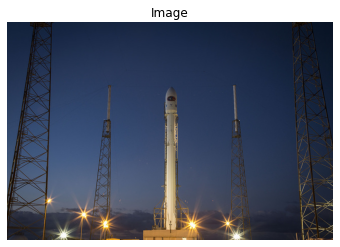

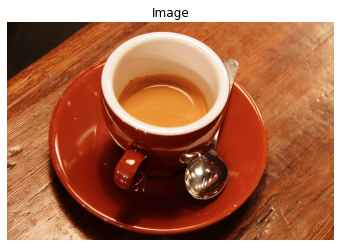

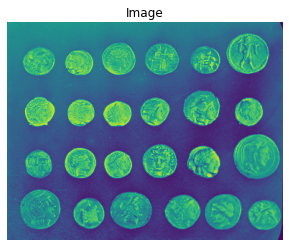

In [4]:
show_image(rocket_image)
show_image(coffee_image)
show_image(coin_image)

In [5]:
#convert RGB to grayscale
from skimage import color
grayscale = color.rgb2gray(rocket_image)
#convert grayscale to RGB
rgb = color.gray2rgb(grayscale)

(427, 640, 3) (427, 640) (427, 640, 3)


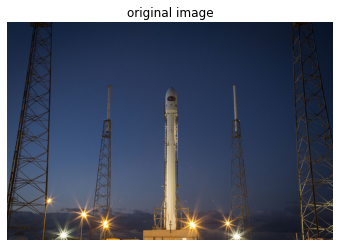

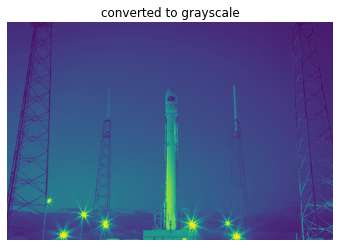

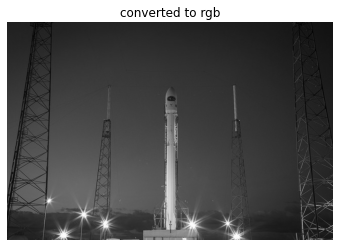

In [6]:
print(rocket_image.shape, grayscale.shape, rgb.shape)
show_image(rocket_image, 'original image')
show_image(grayscale, 'converted to grayscale')
show_image(rgb, 'converted to rgb')

(407, 359, 3)


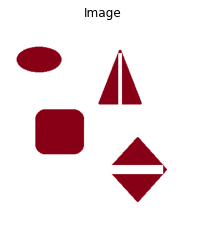

In [7]:
# loading image using matplotlib
image_1 = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/Assignment 1-Image topology and geometric transformations/Image1.png')
print(image_1.shape)
show_image(image_1)

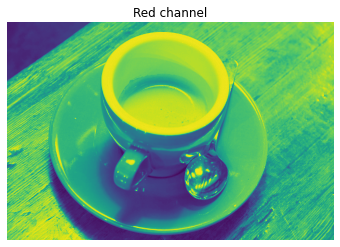

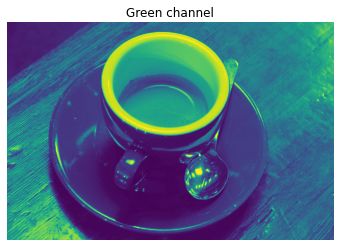

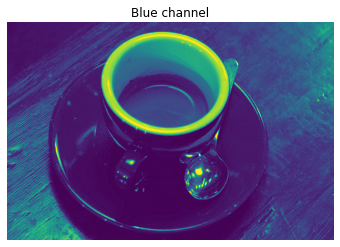

In [8]:
image = coffee_image

#obtain red value of the image
red = image[:,:,0]
#obtain green value of the image
green = image[:,:,1]
#obtain blue value of the image
blue = image[:,:,2]

#visualise all the 
show_image(red, 'Red channel')
show_image(green, 'Green channel')
show_image(blue, 'Blue channel')

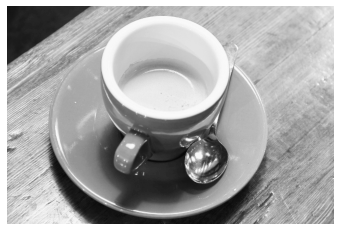

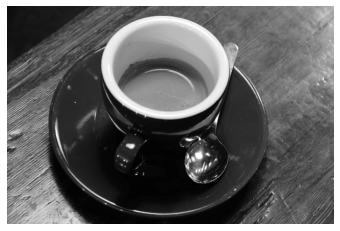

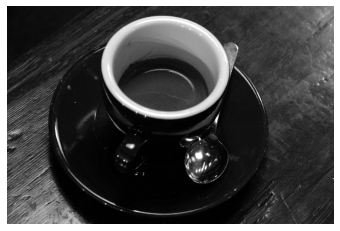

In [9]:
# see image in grey colormap
plt.imshow(red, cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(green, cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(blue, cmap="gray")
plt.axis('off')
plt.show()

image type:  <class 'numpy.ndarray'>


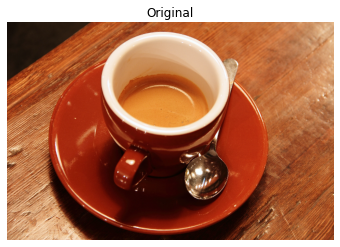

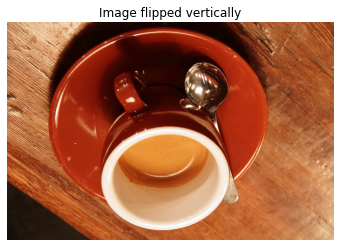

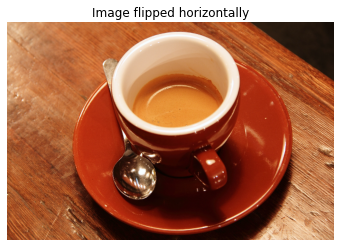

In [10]:
import numpy as np

#image type
print('image type: ',type(coffee_image))

#origital image
show_image(coffee_image, 'Original')

# filp image vertically
vertically_flipped = np.flipud(coffee_image)
show_image(vertically_flipped, 'Image flipped vertically')

# filp image horizontally
horizontally_flipped = np.fliplr(coffee_image)
show_image(horizontally_flipped, 'Image flipped horizontally')

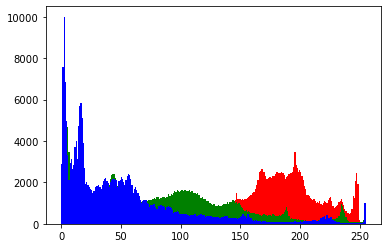

In [11]:
#obrtain a red channel histogram
plt.hist(red.ravel(), bins=256, color = 'r')
#obrtain a green channel histogram
plt.hist(green.ravel(), bins=256, color = 'g')
#obrtain a blue channel histogram
plt.hist(blue.ravel(), bins=256, color = 'b')
plt.show()


### Thresholding is the simplest method of image segmentation
Thresholding is used to partition the background and foreground of grayscale images, by essentially making them black and white. We compare each pixel to a given threshold value. If the pixel is less than that value, we turn it white. If it's greater; we turn it black.

Image shape is : (839, 986, 3)
Image shape now is : (839, 986)


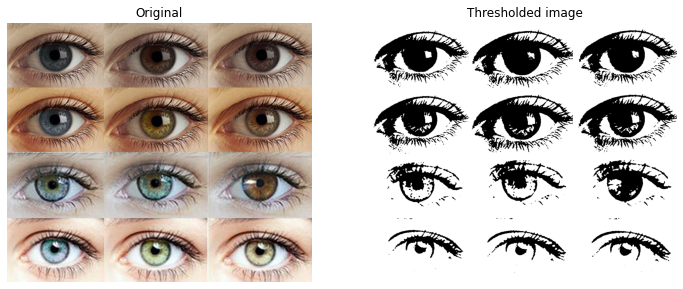

In [12]:
# loading image using matplotlib
eye = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/eye.jpeg')

print('Image shape is :',eye.shape)

# Make the image grayscale using rgb2gray
eye_gray = color.rgb2gray(eye)

print('Image shape now is :',eye_gray.shape)

# obtain the optimal threshold value
threshold = .4

#apply threshold to image
binary  = eye_gray > threshold
# show_image(eye, 'original image')
# show_image(binary, 'Thresholded image')
plot_comparison(eye, binary, 'Thresholded image')

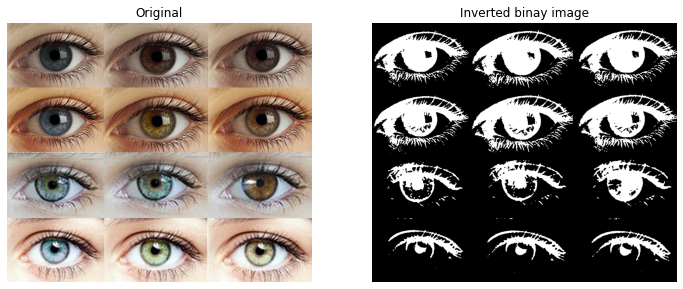

In [13]:
#apply inverse thresholding to image
inverted_binary = eye_gray <= threshold
# show_image(inverted_binary, 'Inverted thresholded')
plot_comparison(eye, inverted_binary, "Inverted binay image")

[]

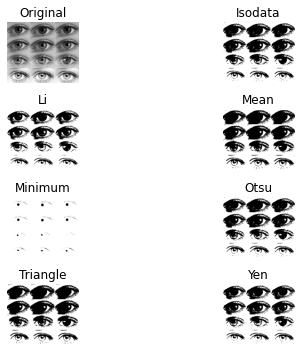

In [14]:
#More thresholding algorithm
from skimage.filters import try_all_threshold

#obtain all resulting image
fig,ax = try_all_threshold(eye_gray, verbose=False)
plt.plot()

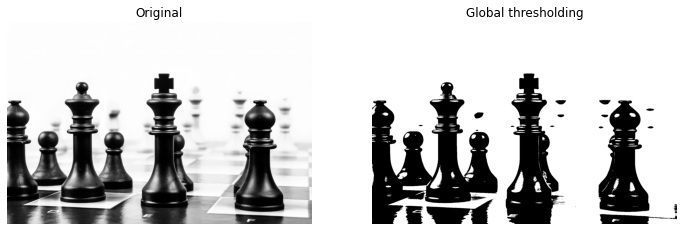

In [15]:
# When the background of an image seems uniform, global thresholding works best.
# loading image using matplotlib
chess = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/bw.jpg')
# Make the image grayscale using rgb2gray
chess_gray = color.rgb2gray(chess)

#import otsu threshold function
from skimage.filters import threshold_otsu

#obtain optimal threshold value
global_threshold = threshold_otsu(chess_gray)

#apply thresholding to image
binary_global = chess_gray > global_threshold

# show_image(chess, 'original')
# show_image(binary_global, 'Global thresholding')
plot_comparison(chess, binary_global, "Global thresholding")

<ipython-input-17-2f8e14a87c54>:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  moon_sharp_gray = color.rgb2gray(moon_sharp)


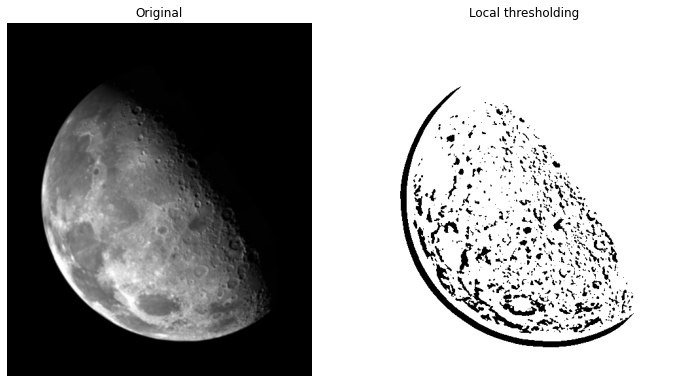

In [17]:
# If the image doesn't have high contrast or the background is uneven, local thresholding produces better results

#import local threshold function
from skimage.filters import threshold_local
# loading image using matplotlib
moon_sharp = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/moonunsharp.tif')
moon_sharp_gray = color.rgb2gray(moon_sharp)

#set the block size (aka local neighbourhood ) to 35
block_size = 35

#obtian the optimal local threshodling
local_threshold = threshold_local(moon_sharp_gray, block_size, offset=10)

#apply local thresholding and obtian the binary image
binary_local = moon_sharp_gray > local_threshold

# show_image(binary_local, 'Local thresholding')
plot_comparison(moon_sharp, binary_local, 'Local thresholding')

## Filters, Contrast, Transformation and Morphology 

### Filters
Filtering is a technique for modifying or enhancing an image. In essence, a filter is a mathematical function that is applied to images. It can be used to,  
- emphasize or remove certain features, like edges.   
- Smoothing,   
- sharpening and   
- edge detection. 

#### Edge detection
With filtering we can detect edges. This technique can be used to find the boundaries of objects within images. As well as segment and extract information like how many coins are in an image. Most of the shape information of an image is enclosed in edges.  
A common edge detection algorithm is Sobel.

<ipython-input-18-758b89474290>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  coin_image_gray = color.rgb2gray(coin_image)


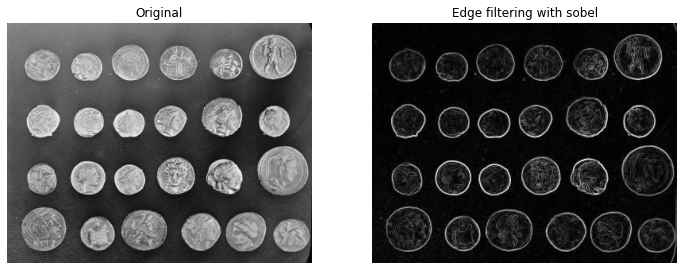

In [18]:
# import module and function
from skimage.filters import sobel

# Make the image grayscale using rgb2gray
coin_image_gray = color.rgb2gray(coin_image)

#apply edge detection filter
edge_sobel = sobel(coin_image_gray)

# show_image(coin_image, 'Original')
# show_image(edge_sobel, "Edge with sobel")
plot_comparison(coin_image, edge_sobel,"Edge filtering with sobel" )

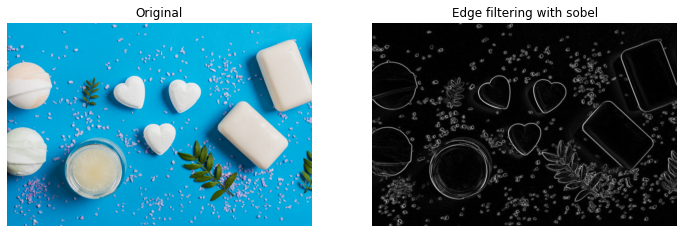

In [19]:
# loading image using matplotlib
soap_image = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/soap_image.jpeg')


# Make the image grayscale using rgb2gray
soap_image_gray = color.rgb2gray(soap_image)

#apply edge detection filter
edge_sobel = sobel(soap_image_gray)

# show_image(coin_image, 'Original')
# show_image(edge_sobel, "Edge with sobel")
plot_comparison(soap_image, edge_sobel,"Edge filtering with sobel" )

#### Gaussian smoothing
This technique is typically used to blur an image or to reduce noise. This is used in other techniques like anti-aliasing filtering.



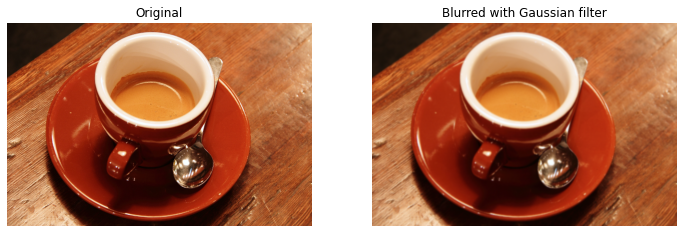

In [20]:
# import module and function
from skimage.filters import gaussian

#apply filter, multichannel True if color image else False
gaussian_image = gaussian(coffee_image, multichannel=True)

#show original vs resulting image
plot_comparison(coffee_image, gaussian_image, "Blurred with Gaussian filter")

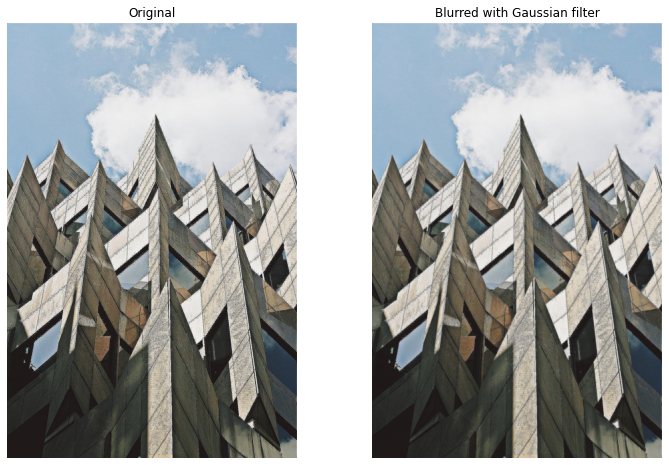

In [21]:
# loading image using matplotlib
building_image = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/building.jpeg')

#apply filter, multichannel True if color image else False
gaussian_image = gaussian(building_image, multichannel=True)

#show original vs resulting image
plot_comparison(building_image, gaussian_image, "Blurred with Gaussian filter")


#### Contrast enhancement
We can enhance contrast through contrast stretching which is used to stretch the histogram so the full range of intensity values of the image is filled. And histogram equalization, that spreads out the most frequent histogram intensity values using probability distribution.

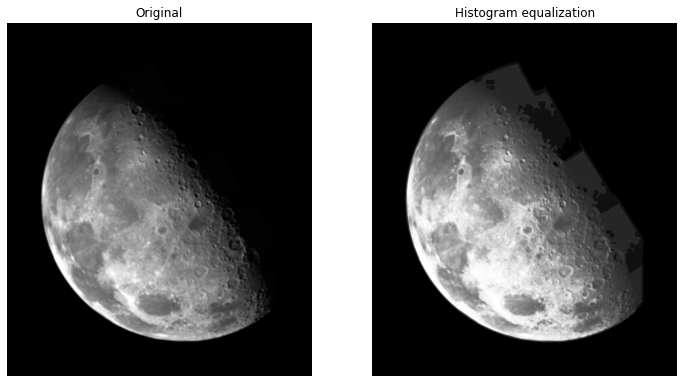

In [22]:
# import module and function
from skimage import exposure

#obtian equalized image
image_eq = exposure.equalize_hist(moon_sharp)

#show original vs resulting image
plot_comparison(moon_sharp, image_eq, "Histogram equalization")


#### Adaptive equalization

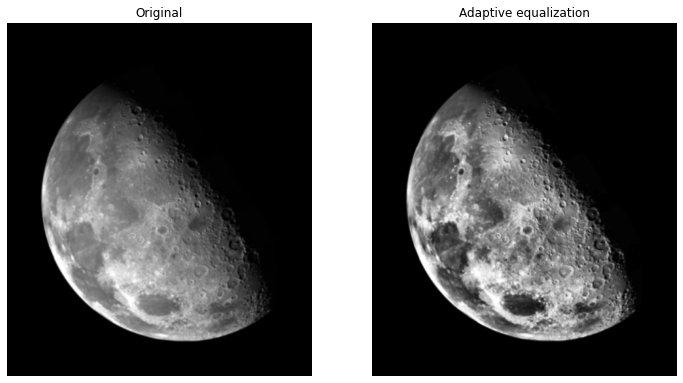

In [23]:
# Apply adaptive equalization
image_adapteq = exposure.equalize_adapthist(moon_sharp, clip_limit=0.01) #clip_limit higher value = more contrast

#show original vs resulting image
plot_comparison(moon_sharp, image_adapteq, "Adaptive equalization")

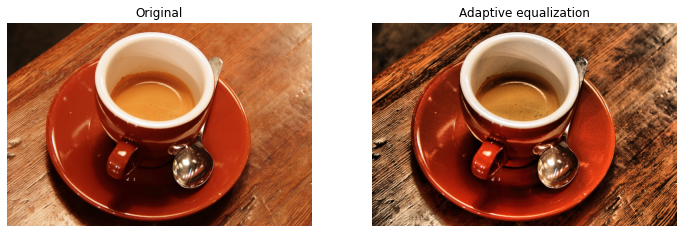

In [24]:
# Apply adaptive equalization
image_adapteq = exposure.equalize_adapthist(coffee_image, clip_limit=0.02) #clip_limit higher value = more contrast

#show original vs resulting image
plot_comparison(coffee_image, image_adapteq, "Adaptive equalization")

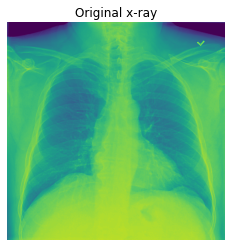

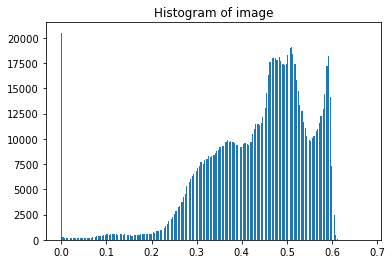

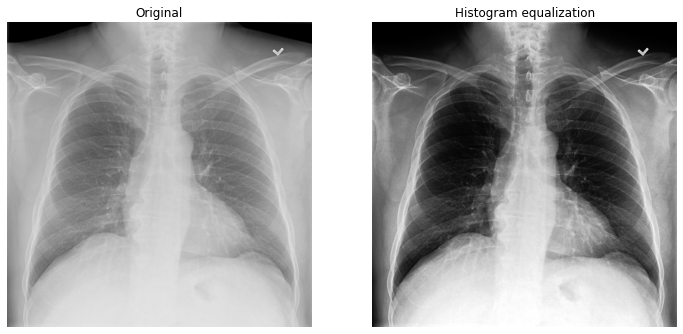

In [25]:
# loading image using matplotlib
x_ray_image = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/chest_x_ray.png')

# Show original x-ray image and its histogram
show_image(x_ray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(x_ray_image.ravel(), bins=256)
plt.show()
#obtian equalized image
image_eq = exposure.equalize_hist(x_ray_image)

#show original vs resulting image
plot_comparison(x_ray_image, image_eq, "Histogram equalization")



### Transformation
rotating or resizing. 

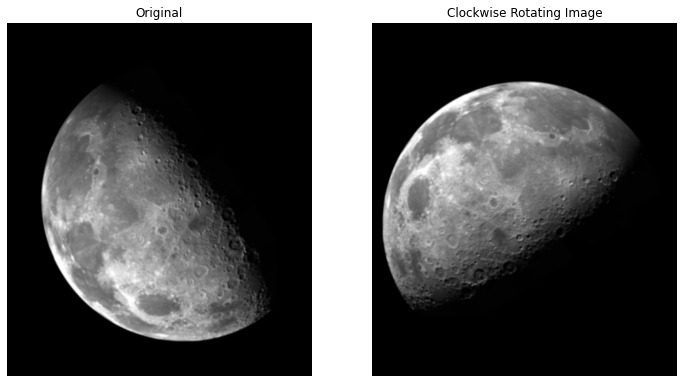

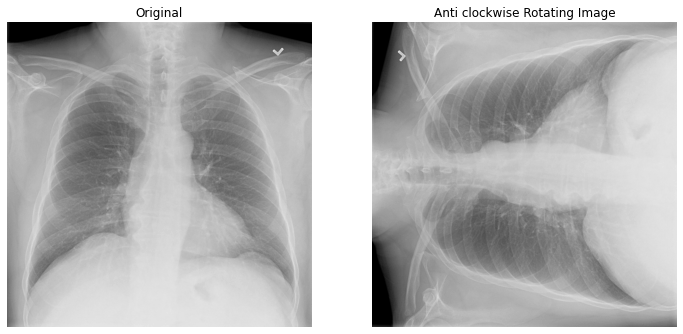

In [28]:
# import module and function
from skimage.transform import rotate

# rotate image 90 degree clockwise
image_rotated_clock = rotate(moon_sharp, -90)
image_rotated_anticlock = rotate(x_ray_image, 90)

#show original vs resulting image
plot_comparison(moon_sharp, image_rotated_clock, "Clockwise Rotating Image")
plot_comparison(x_ray_image, image_rotated_anticlock, "Anti clockwise Rotating Image")

### Rescaling


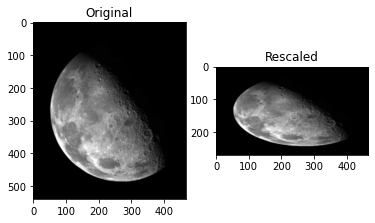

In [48]:
# import module and function
from skimage.transform import rescale

# rescale 4 times smaller
# Setting an anti_aliasing boolean parameter to true specifies if applying a filter to smooth the image prior to down-scaling.
# multichannel if the image is colored.
image_rescaled = rescale(moon_sharp, 1/2, anti_aliasing=True, multichannel=True) 

#show original vs resulting image

fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(moon_sharp, cmap = plt.cm.gray)
ax1.set_title('Original')

ax2.imshow(image_rescaled, cmap = plt.cm.gray)
ax2.set_title("Rescaled")
plt.show()

### Resizing

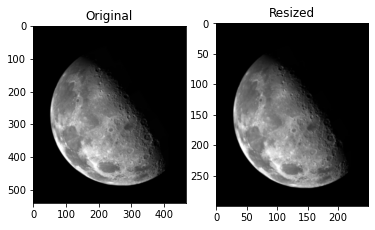

In [43]:
# import module and function
from skimage.transform import resize

# Height and width to resize
height = 300
width = 250

#resize image
image_resize = resize(moon_sharp,(height,width),anti_aliasing=True )

fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(moon_sharp, cmap = plt.cm.gray)
ax1.set_title('Original')

ax2.imshow(image_resize, cmap = plt.cm.gray)
ax2.set_title("Resized")
plt.show()



#### Resizing with proportion

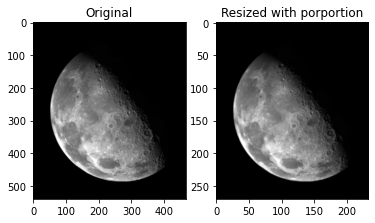

In [46]:
# Height and width by taking original width size of the image and dividing it by the scaling factor.
height = moon_sharp.shape[0]/2
width = moon_sharp.shape[1]/2

#resize image
image_resize = resize(moon_sharp,(height,width),anti_aliasing=True )

fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(moon_sharp, cmap = plt.cm.gray)
ax1.set_title('Original')

ax2.imshow(image_resize, cmap = plt.cm.gray)
ax2.set_title("Resized with porportion")
plt.show()

## Morphology
Binary regions produced by simple thresholding can be distorted by noise and texture. 

In [49]:
from skimage import morphology

square = morphology.square(4)

rectangle = morphology.rectangle(4,2)

print(square)

print(rectangle)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1]
 [1 1]
 [1 1]
 [1 1]]


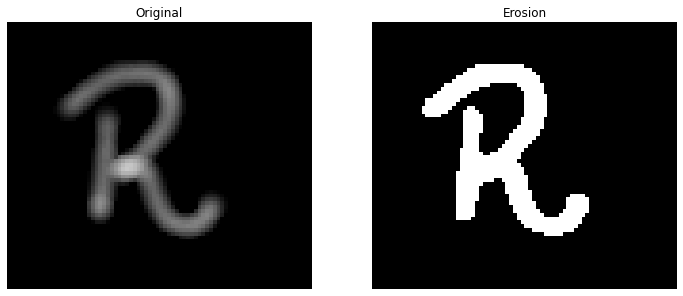

In [55]:
# loading image using matplotlib
upper_r = plt.imread('/Users/imak/Documents/Python/Projects/Digital_Image_Processing/upper_r_image.png')

# # set structuring element to the rectangular shape
# selem = rectangle(12,6)

# Make the image grayscale using rgb2gray
upper_r_image_gray = color.rgb2gray(upper_r)

#obtain the erosed image with binary erosion
erode_image = morphology.binary_erosion(upper_r_image_gray)

plot_comparison(upper_r, erode_image, "Erosion")

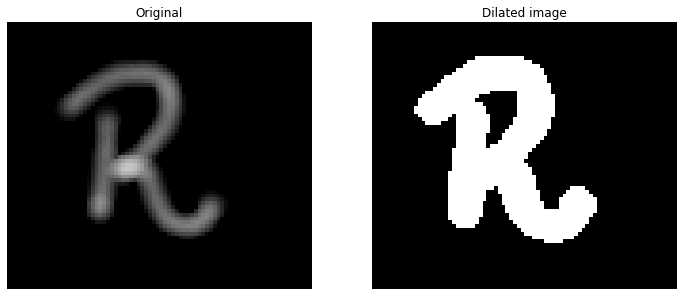

In [57]:
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(upper_r_image_gray)

# See results
plot_comparison(upper_r, dilated_image, "Dilated image")